In [ ]:
from google.colab import drive
drive.mount('/content/drive',, force_remount=True)
data = '/content/drive/My Drive/Team_Project/AL_File/Journal_Data_NER.xlsx'
labeldata = '/content/drive/My Drive/Team_Project/AL_File/NewDataset_Journal.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
# Load the dataset
df = pd.read_excel(data)

# Check if the dataset is loaded
df

,Unnamed: 0,uid,startTime,record,reflection_sentiment,reflection_sent_score,text_cleaned
0,7,96171,2024-02-18T23:19:00.599000+00:00,reflection,negative,0.868252,Really bad today
1,16,105098,2024-02-18T19:35:34.247000+00:00,reflection,positive,0.790428,Suddenly feel wave of sadnessâ€¦I think becaus...
2,23,107683,2024-02-18T17:08:02.065000+00:00,reflection,neutral,0.420114,I am still on edge thinking about how to put m...
3,24,105098,2024-02-17T21:23:40.681000+00:00,reflection,negative,0.918125,When I see pics of [Named Entity] as a child I...
4,42,84897,2024-02-17T07:31:03.074000+00:00,reflection,negative,0.894313,"Oh so much bubbling under. Embarrassed, annoye..."
...,...,...,...,...,...,...,...
7196,35328,118299,2024-07-31T21:51:04.932000+00:00,reflection,positive,0.915258,Getting ready for bed. Iâ€™m proud of myself ...
7197,35329,117383,2024-07-31T21:56:44.523000+00:00,reflection,positive,0.751939,An ok dayâ€¦thought it started ok then got mor...
7198,35348,78719,2024-03-18T04:37:01.356000+00:00,reflection,negative,0.860940,Today I found out that [Named Entity] has been...
7199,35352,110424,2024-03-18T11:51:36.103000+00:00,reflection,negative,0.701141,I wake up every day missing you. Youâ€™re the ...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Basic Information about the dataset
print("Basic Information about the dataset")
print(df.info())
print("\n")

Basic Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7201 non-null   int64  
 1   uid                    7201 non-null   int64  
 2   startTime              7201 non-null   object 
 3   record                 7201 non-null   object 
 4   reflection_sentiment   7128 non-null   object 
 5   reflection_sent_score  7128 non-null   float64
 6   text_cleaned           7201 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 393.9+ KB
None




In [ ]:
# 2. Descriptive Statistics
print("Descriptive Statistics of Numerical Columns")
print(df.describe())
print("\n")

Descriptive Statistics of Numerical Columns
         Unnamed: 0            uid  reflection_sent_score
count   7201.000000    7201.000000            7128.000000
mean   17439.931260   57361.801416               0.752628
std     9787.359775   33618.712571               0.169007
min        7.000000    7325.000000               0.341471
25%     9571.000000   30027.000000               0.619294
50%    17027.000000   45855.000000               0.797553
75%    25357.000000   85831.000000               0.896174
max    35353.000000  120958.000000               0.990187




In [ ]:
# 3. Checking for missing values
print("Checking for Missing Values")
print(df.isnull().sum())
print("\n")

Checking for Missing Values
Unnamed: 0                0
uid                       0
startTime                 0
record                    0
reflection_sentiment     73
reflection_sent_score    73
text_cleaned              0
dtype: int64




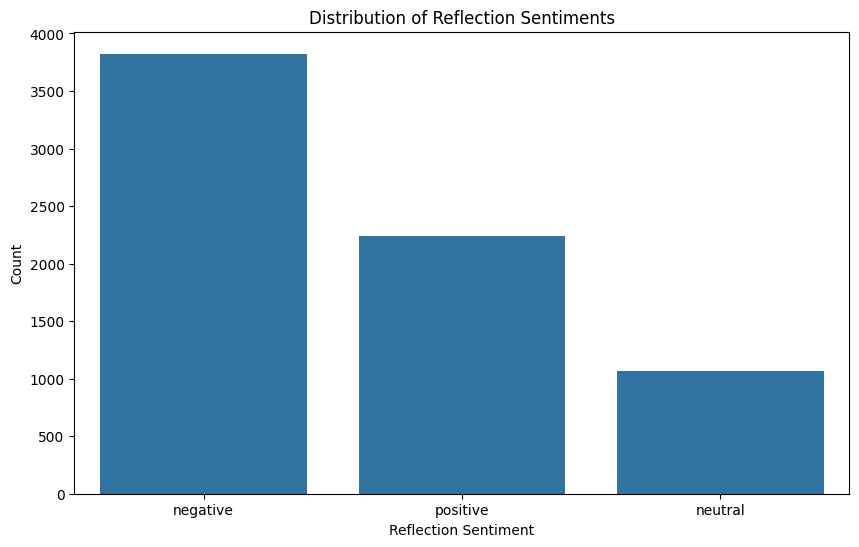

In [ ]:
# 4. Distribution of reflection sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='reflection_sentiment', data=df)
plt.title('Distribution of Reflection Sentiments')
plt.xlabel('Reflection Sentiment')
plt.ylabel('Count')
plt.show()

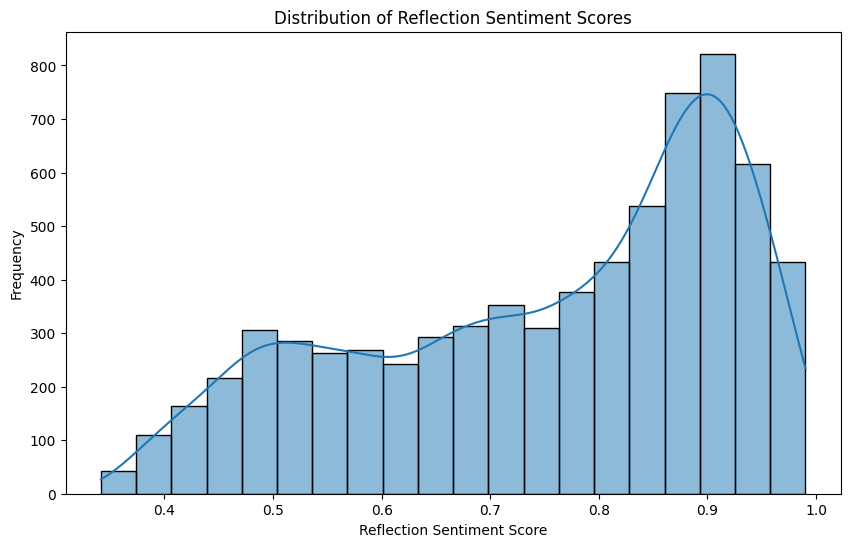

In [ ]:
# 5. Analyzing Reflection Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['reflection_sent_score'], bins=20, kde=True)
plt.title('Distribution of Reflection Sentiment Scores')
plt.xlabel('Reflection Sentiment Score')
plt.ylabel('Frequency')
plt.show()

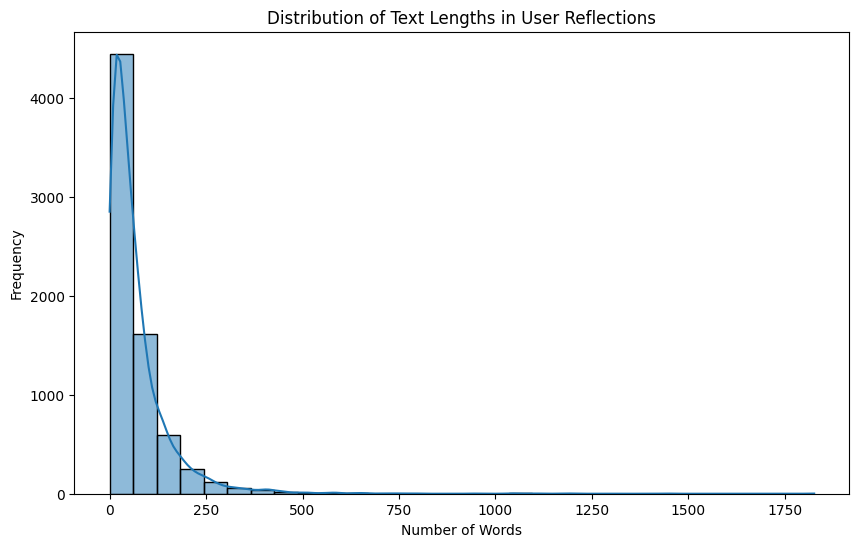

In [ ]:
# 6. Length of the text in the 'record' column (number of words)
df['text_length'] = df['text_cleaned'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths in User Reflections')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<ipython-input-47-b26485348215>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')  # 'coolwarm' provides a color gradient


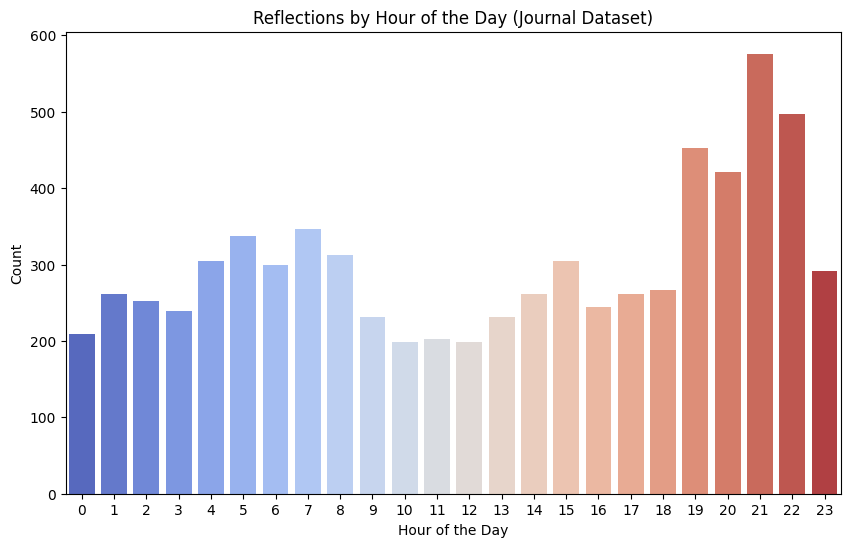

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time-based analysis
df['startTime'] = pd.to_datetime(df['startTime'])  # Convert 'startTime' to datetime format
df['hour'] = df['startTime'].dt.hour  # Extract the hour

plt.figure(figsize=(10, 6))

# Create a count plot with a color palette that changes based on count
sns.countplot(x='hour', data=df, palette='coolwarm')  # 'coolwarm' provides a color gradient

plt.title('Reflections by Hour of the Day (Journal Dataset)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


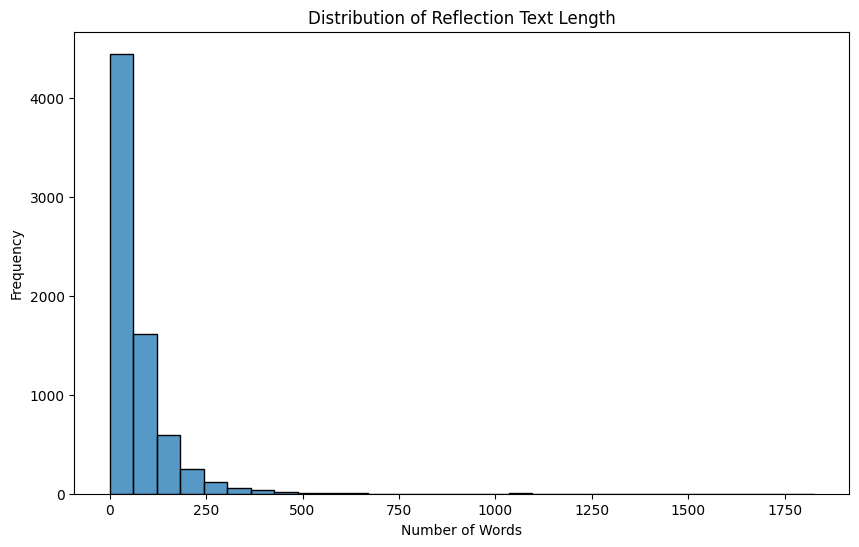

count    7201.000000
mean       69.330649
std        89.404996
min         0.000000
25%        19.000000
50%        44.000000
75%        87.000000
max      1826.000000
Name: text_length, dtype: float64


In [ ]:
# Add text length column (if not already calculated)
df['text_length'] = df['text_cleaned'].apply(lambda x: len(str(x).split()))

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=False)
plt.title('Distribution of Reflection Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for text lengths
print(df['text_length'].describe())


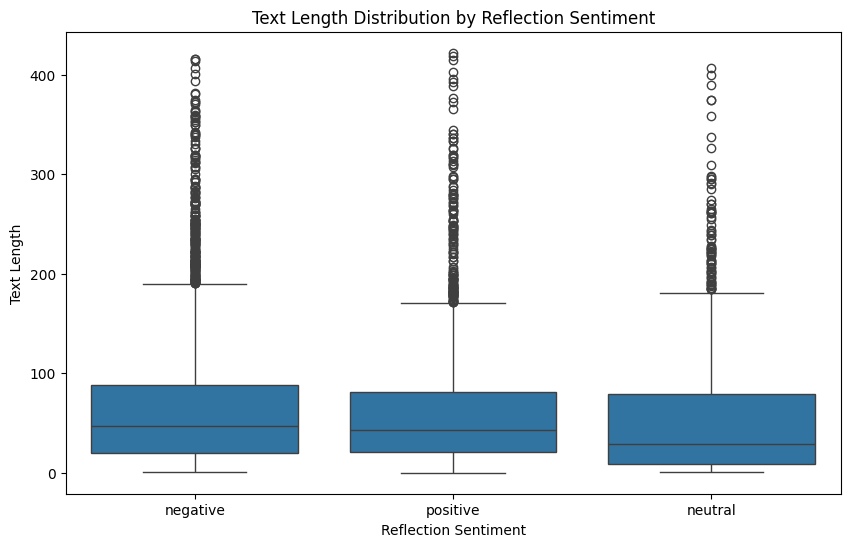

In [ ]:
# Boxplot of text length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='reflection_sentiment', y='text_length', data=df)
plt.title('Text Length Distribution by Reflection Sentiment')
plt.xlabel('Reflection Sentiment')
plt.ylabel('Text Length')
plt.show()


In [ ]:
# Longest reflections
longest_reflections = df.nlargest(5, 'text_length')[['text_cleaned', 'text_length']]
print("Longest Reflections:")
print(longest_reflections)

# Shortest reflections
shortest_reflections = df.nsmallest(5, 'text_length')[['text_cleaned', 'text_length']]
print("\nShortest Reflections:")
print(shortest_reflections)


Longest Reflections:
                                           text_cleaned  text_length
2116  Got it, cycle of loss and original family atta...         1826
6834  I am trying to understand how our relationship...         1443
3973  Like God hates me and he didnâ€™t help [Named ...         1276
2218  Roominating  mind has woke me going over [Name...         1195
2306  Tightness in my chest, my hart, tension around...         1175

Shortest Reflections:
     text_cleaned  text_length
3532           \n            0
85          Good             1
147            Ok            1
198          Good            1
231        Soothe            1


#Perform EDA on labeled Journal dataset

In [ ]:
df1 = pd.read_excel(labeldata)

# Overview of the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           500 non-null    int64  
 1   Unnamed: 0             300 non-null    float64
 2   uid                    300 non-null    float64
 3   startTime              300 non-null    object 
 4   record                 300 non-null    object 
 5   reflection_sentiment   298 non-null    object 
 6   reflection_sent_score  298 non-null    float64
 7   text_ner               500 non-null    object 
 8   final_label            442 non-null    object 
 9   Adaptive               500 non-null    object 
 10  Unnamed: 10            1 non-null      object 
dtypes: float64(3), int64(1), object(7)
memory usage: 43.1+ KB
None


In [ ]:
print(df1.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'startTime', 'record',
       'reflection_sentiment', 'reflection_sent_score', 'text_ner',
       'final_label', 'Adaptive', 'Unnamed: 10'],
      dtype='object')


In [ ]:
df1.columns = df1.columns.str.strip()

In [ ]:
# Summary statistics for numerical columns
print(df1.describe())

       Unnamed: 0.1    Unnamed: 0            uid  reflection_sent_score
count    500.000000    300.000000     300.000000             298.000000
mean     250.500000  16501.090000   56924.053333               0.744479
std      144.481833   9666.472489   32889.159384               0.173994
min        1.000000    114.000000    7325.000000               0.387571
25%      125.750000   9081.750000   31093.750000               0.594784
50%      250.500000  15614.000000   45805.500000               0.779838
75%      375.250000  23680.000000   85329.500000               0.899366
max      500.000000  35306.000000  120958.000000               0.986071


In [ ]:
# Check for missing values
print(df1.isnull().sum())

Unnamed: 0.1               0
Unnamed: 0               200
uid                      200
startTime                200
record                   200
reflection_sentiment     202
reflection_sent_score    202
text_ner                   0
final_label               58
Adaptive                   0
Unnamed: 10              499
dtype: int64


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1['er_labels'] = df1['final_label'].apply(
        lambda x: [label.strip() for label in x.split(",")] if pd.notna(x) else ["None"]
    )
# Prepare label binarizer
mlb = MultiLabelBinarizer()
y_labels = mlb.fit_transform(df1['er_labels'])
label_classes = mlb.classes_

print(label_classes)

['Attentional Deployment' 'Cognitive Change' 'None' 'Response Modulation'
 'Situation Modification' 'Situation Selection']


<ipython-input-34-336dd4bce18c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


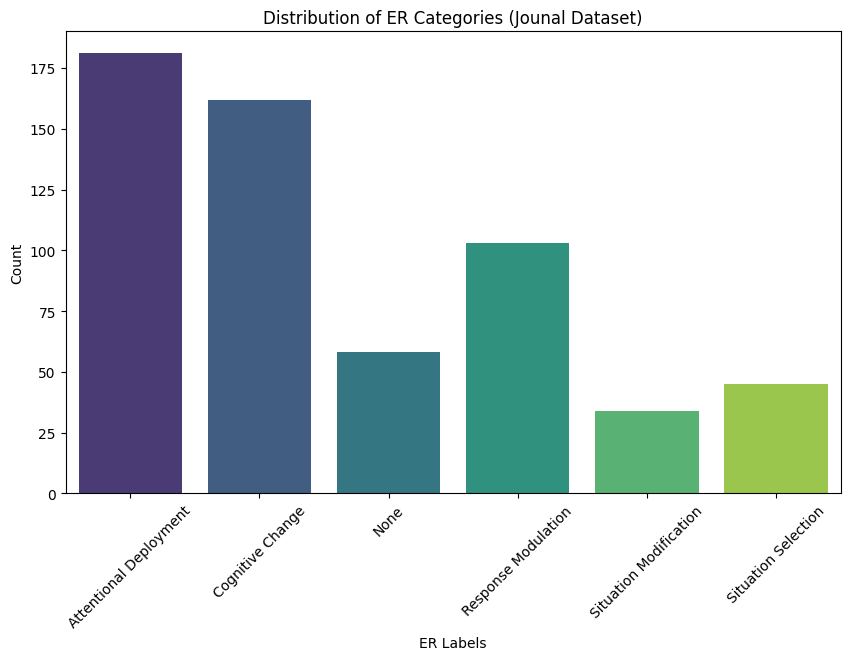

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# Count occurrences of each category
label_counts = pd.DataFrame(y_labels, columns=label_classes).sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of ER Categories (Jounal Dataset)')
plt.xlabel('ER Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df1['Adaptive'].unique())

['maladaptive' 'adaptive' 'none']


In [ ]:
df1['Adaptive'] = df1['Adaptive'].str.strip().str.lower()  # Remove any extra spaces and convert to lowercase

<ipython-input-50-1be01378330a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Adaptive', data=df1, palette="viridis")  # Count occurrences of 'Adaptive' and 'Maladaptive'


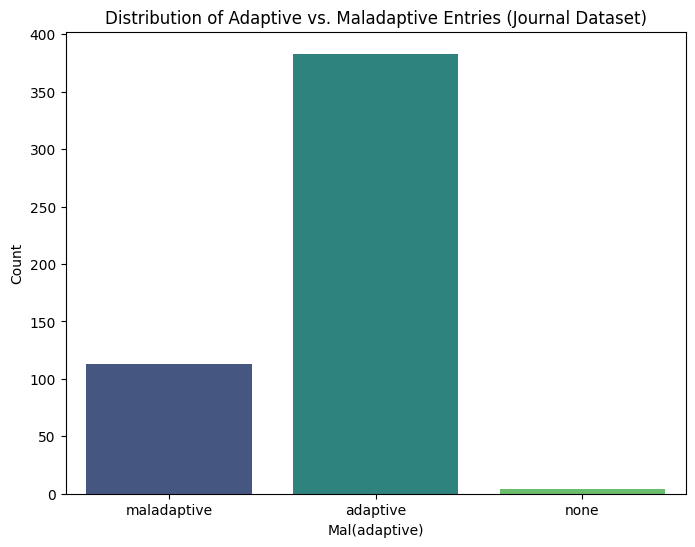

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Adaptive' column contains values like 'Adaptive' and 'Maladaptive'
plt.figure(figsize=(8, 6))
sns.countplot(x='Adaptive', data=df1, palette="viridis")  # Count occurrences of 'Adaptive' and 'Maladaptive'
plt.title('Distribution of Adaptive vs. Maladaptive Entries (Journal Dataset)')
plt.xlabel('Mal(adaptive)')
plt.ylabel('Count')
plt.show()